In [ ]:
import pandas as pd

# Import data
data = pd.read_excel('F:/nasa_power_data_filtered_within.xlsx')

# Get the columns from the third column to the last column
selected_columns = data.columns[2:]

# Calculate summary statistics for the selected columns
summary_stats = data[selected_columns].describe()

# Set the name "time" for the cell in the first row and first column (A1 cell in Excel)
summary_stats.index.name = 'time'

# Print the summary statistics for the selected columns
print("\nSummary Statistics:")
print(summary_stats)

# Save the summary statistics to an Excel file
summary_stats.to_excel('F:/nasa_power_data_filtered_within_describe.xlsx')


In [ ]:
import pandas as pd

data = pd.read_excel('F:/nasa_power_data_filtered_within_describe.xlsx')
data_transpose = data.T

# Shift rows up by one position (row 2 becomes row 1)
data_transpose.to_excel('F:/nasa_power_data_filtered_within_describe_transpose.xlsx', startrow=0, header=False)

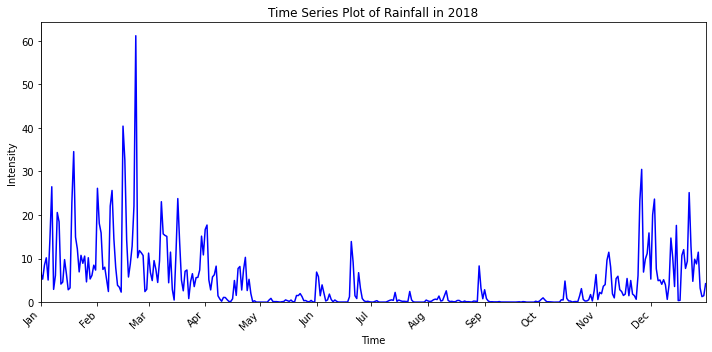

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

# Baca file dari direktori f
file_path = 'f:/nasa_power_data_filtered_within_describe_transpose.xlsx'
data = pd.read_excel(file_path)

# Ubah tipe data 'time' menjadi datetime
data['time'] = pd.to_datetime(data['time'])

# Filter data untuk tahun 2018
data_2018 = data[data['time'].dt.year == 2018]

# Konversi Series ke NumPy array
time_values = data_2018['time'].to_numpy()
mean_values = data_2018['mean'].to_numpy()

# Plot time series tanpa titik-titik
plt.figure(figsize=(10, 5))
plt.plot(time_values, mean_values, color='blue')  # Change the color to blue

# Atur judul dan label
plt.title('Time Series Plot of Rainfall in 2018')
plt.xlabel('Time')
plt.ylabel('Intensity')

# Set date format and ticks on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format with month abbreviation
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility

# Set x-axis limit to start from January and end at the last day of December
plt.xlim(left=pd.Timestamp('2018-01-01'), right=pd.Timestamp('2018-12-31'))

# Set y-axis limit to start from 0
plt.ylim(bottom=0)

# Tampilkan plot
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(pd.Timestamp('2018-01-01'), color='black', linewidth=0.5)  # Add vertical line at x=0

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

# Baca file dari direktori f
file_path = 'f:/nasa_power_data_filtered_within_describe_transpose.xlsx'
data = pd.read_excel(file_path)

# Ubah tipe data 'time' menjadi datetime
data['time'] = pd.to_datetime(data['time'])

# Filter data untuk tahun 2018
data_2018 = data[data['time'].dt.year == 2018]

# Statistik deskriptif
descriptive_stats = data_2018['mean'].describe()

# Tampilkan statistik deskriptif
print(descriptive_stats)

# Inisialisasi DataFrame untuk menyimpan informasi per bulan
monthly_stats = pd.DataFrame(index=range(1, 13), columns=['Min Date', 'Min Value', 'Max Date', 'Max Value', 'Mode Value', 'Mode Dates'])

# Loop untuk setiap bulan
for month in range(1, 13):
    # Filter data untuk bulan tertentu
    data_month = data_2018[data_2018['time'].dt.month == month]

    # Temukan nilai maksimum, minimum, dan modus
    max_date = data_month.loc[data_month['mean'].idxmax()]['time'].date()
    max_value = data_month['mean'].max()

    min_date = data_month.loc[data_month['mean'].idxmin()]['time'].date()
    min_value = data_month['mean'].min()

    mode_values = data_month['mean'].mode()
    mode_dates = data_month[data_month['mean'].isin(mode_values)]['time'].dt.date

    # Simpan informasi ke dalam DataFrame
    monthly_stats.loc[month] = [min_date, min_value, max_date, max_value, mode_values.values, mode_dates.values]

# Tampilkan informasi per bulan
print("\nMonthly Statistics:")
print(monthly_stats)


count    365.000000
mean       4.671401
std        7.198783
min        0.000588
25%        0.144396
50%        1.474895
75%        6.763617
max       61.144096
Name: mean, dtype: float64

Monthly Statistics:
      Min Date Min Value    Max Date  Max Value  \
1   2018-01-16  2.844588  2018-01-19  34.549866   
2   2018-02-14  2.300537  2018-02-22  61.144096   
3   2018-03-15  0.485636  2018-03-17  23.770895   
4   2018-04-29  0.013252  2018-04-02  17.695597   
5   2018-05-02  0.000652  2018-05-23   1.959693   
6   2018-06-14   0.01531  2018-06-20   13.91322   
7   2018-07-26  0.001604  2018-07-22   2.452805   
8   2018-08-20   0.03145  2018-08-29   8.313157   
9   2018-09-17  0.001265  2018-09-01    2.85085   
10  2018-10-09  0.000588  2018-10-15   4.844633   
11  2018-11-02  0.595572  2018-11-26  30.470364   
12  2018-12-16  0.357706  2018-12-22  25.141597   

                                           Mode Value  \
1   [2.844587859424921, 2.933130990415336, 3.26251...   
2   [2.3005367

In [6]:
# Simpan informasi per bulan ke dalam file Excel
excel_output_path = 'F:/Kuliah/4. ITS s2/2023 - Thesis/Thesis/syntax/deskriptif_2018.xlsx'
monthly_stats.to_excel(excel_output_path, index_label='Month')

print(f'Deskriptif 2018 telah disimpan di:\n{excel_output_path}')


Deskriptif 2018 telah disimpan di:
F:/Kuliah/4. ITS s2/2023 - Thesis/Thesis/syntax/deskriptif_2018.xlsx


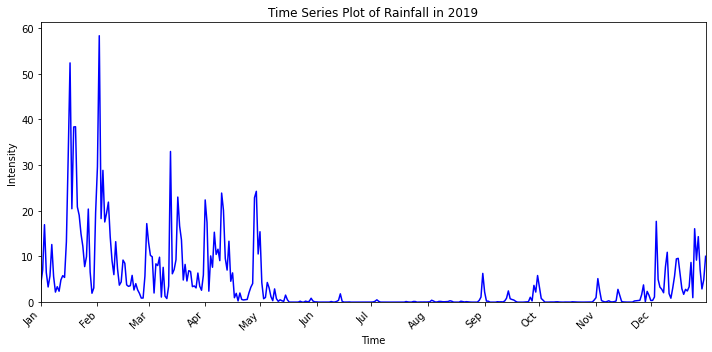

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

# Baca file dari direktori f
file_path = 'f:/nasa_power_data_filtered_within_describe_transpose.xlsx'
data = pd.read_excel(file_path)

# Ubah tipe data 'time' menjadi datetime
data['time'] = pd.to_datetime(data['time'])

# Filter data untuk tahun 2019
data_2019 = data[data['time'].dt.year == 2019]

# Konversi Series ke NumPy array
time_values = data_2019['time'].to_numpy()
mean_values = data_2019['mean'].to_numpy()

# Plot time series tanpa titik-titik
plt.figure(figsize=(10, 5))
plt.plot(time_values, mean_values, color='blue')  # Change the color to blue

# Atur judul dan label
plt.title('Time Series Plot of Rainfall in 2019')
plt.xlabel('Time')
plt.ylabel('Intensity')

# Set date format and ticks on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format with month abbreviation
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility

# Set x-axis limit to start from January and end at the last day of December
plt.xlim(left=pd.Timestamp('2019-01-01'), right=pd.Timestamp('2019-12-31'))

# Set y-axis limit to start from 0
plt.ylim(bottom=0)

# Tampilkan plot
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(pd.Timestamp('2019-01-01'), color='black', linewidth=0.5)  # Add vertical line at x=0

plt.tight_layout()
plt.show()


In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

# Baca file dari direktori f
file_path = 'f:/nasa_power_data_filtered_within_describe_transpose.xlsx'
data = pd.read_excel(file_path)

# Ubah tipe data 'time' menjadi datetime
data['time'] = pd.to_datetime(data['time'])

# Filter data untuk tahun 2019 (perubahan ini)
data_2019 = data[data['time'].dt.year == 2019]

# Statistik deskriptif
descriptive_stats = data_2019['mean'].describe()

# Tampilkan statistik deskriptif
print(descriptive_stats)

# Inisialisasi DataFrame untuk menyimpan informasi per bulan
monthly_stats = pd.DataFrame(index=range(1, 13), columns=['Min Date', 'Min Value', 'Max Date', 'Max Value', 'Mode Value', 'Mode Dates'])

# Loop untuk setiap bulan
for month in range(1, 13):
    # Filter data untuk bulan tertentu
    data_month = data_2019[data_2019['time'].dt.month == month]

    # Temukan nilai maksimum, minimum, dan modus
    max_date = data_month.loc[data_month['mean'].idxmax()]['time'].date()
    max_value = data_month['mean'].max()

    min_date = data_month.loc[data_month['mean'].idxmin()]['time'].date()
    min_value = data_month['mean'].min()

    mode_values = data_month['mean'].mode()
    mode_dates = data_month[data_month['mean'].isin(mode_values)]['time'].dt.date

    # Simpan informasi ke dalam DataFrame
    monthly_stats.loc[month] = [min_date, min_value, max_date, max_value, mode_values.values, mode_dates.values]

# Tampilkan informasi per bulan
print("\nMonthly Statistics:")
print(monthly_stats)


count    365.000000
mean       4.198170
std        7.624683
min        0.000000
25%        0.028102
50%        0.509872
75%        5.415195
max       58.318709
Name: mean, dtype: float64

Monthly Statistics:
      Min Date Min Value    Max Date  Max Value  \
1   2019-01-29   1.94924  2019-01-17  52.367565   
2   2019-02-25  0.891821  2019-02-02  58.318709   
3   2019-03-11  0.785565  2019-03-13  32.980984   
4   2019-04-19  0.268696  2019-04-29  24.261661   
5   2019-05-19  0.000466  2019-05-01  15.414914   
6   2019-06-23  0.000262  2019-06-14   1.820185   
7   2019-07-13  0.002262  2019-07-04   0.509872   
8   2019-08-18   0.00055  2019-08-31   6.293157   
9   2019-09-22       0.0  2019-09-30   5.825118   
10  2019-10-14  0.002722  2019-10-01    3.31669   
11  2019-11-19  0.006882  2019-11-02   5.153278   
12  2019-12-01  0.359457  2019-12-04  17.686511   

                                           Mode Value  \
1   [1.949239616613419, 2.20361661341853, 2.389539...   
2   [0.8918210

In [11]:
# Simpan informasi per bulan ke dalam file Excel
excel_output_path = 'F:/Kuliah/4. ITS s2/2023 - Thesis/Thesis/syntax/deskriptif_2019.xlsx'
monthly_stats.to_excel(excel_output_path, index_label='Month')

print(f'Deskriptif 2019 telah disimpan di:\n{excel_output_path}')

Deskriptif 2019 telah disimpan di:
F:/Kuliah/4. ITS s2/2023 - Thesis/Thesis/syntax/deskriptif_2019.xlsx


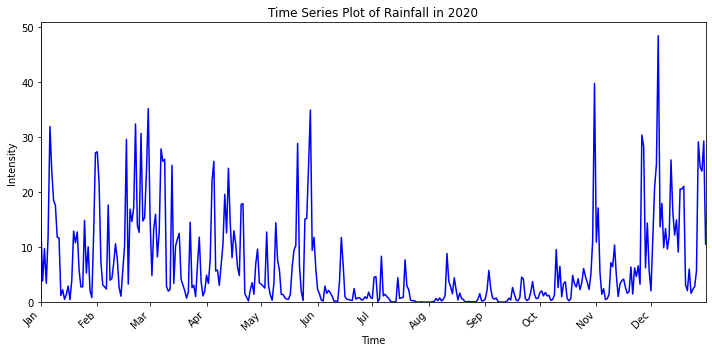

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

# Baca file dari direktori f
file_path = 'f:/nasa_power_data_filtered_within_describe_transpose.xlsx'
data = pd.read_excel(file_path)

# Ubah tipe data 'time' menjadi datetime
data['time'] = pd.to_datetime(data['time'])

# Filter data untuk tahun 2020
data_2020 = data[data['time'].dt.year == 2020]

# Konversi Series ke NumPy array
time_values = data_2020['time'].to_numpy()
mean_values = data_2020['mean'].to_numpy()

# Plot time series tanpa titik-titik
plt.figure(figsize=(10, 5))
plt.plot(time_values, mean_values, color='blue')  # Change the color to blue

# Atur judul dan label
plt.title('Time Series Plot of Rainfall in 2020')
plt.xlabel('Time')
plt.ylabel('Intensity')

# Set date format and ticks on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format with month abbreviation
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility

# Set x-axis limit to start from January and end at the last day of December
plt.xlim(left=pd.Timestamp('2020-01-01'), right=pd.Timestamp('2020-12-31'))

# Set y-axis limit to start from 0
plt.ylim(bottom=0)

# Tampilkan plot
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(pd.Timestamp('2020-01-01'), color='black', linewidth=0.5)  # Add vertical line at x=0

plt.tight_layout()
plt.show()


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

# Baca file dari direktori f
file_path = 'f:/nasa_power_data_filtered_within_describe_transpose.xlsx'
data = pd.read_excel(file_path)

# Ubah tipe data 'time' menjadi datetime
data['time'] = pd.to_datetime(data['time'])

# Filter data untuk tahun 2020 (perubahan ini)
data_2020 = data[data['time'].dt.year == 2020]

# Statistik deskriptif
descriptive_stats = data_2020['mean'].describe()

# Tampilkan statistik deskriptif
print(descriptive_stats)

# Inisialisasi DataFrame untuk menyimpan informasi per bulan
monthly_stats = pd.DataFrame(index=range(1, 13), columns=['Min Date', 'Min Value', 'Max Date', 'Max Value', 'Mode Value', 'Mode Dates'])

# Loop untuk setiap bulan
for month in range(1, 13):
    # Filter data untuk bulan tertentu
    data_month = data_2020[data_2020['time'].dt.month == month]

    # Temukan nilai maksimum, minimum, dan modus
    max_date = data_month.loc[data_month['mean'].idxmax()]['time'].date()
    max_value = data_month['mean'].max()

    min_date = data_month.loc[data_month['mean'].idxmin()]['time'].date()
    min_value = data_month['mean'].min()

    mode_values = data_month['mean'].mode()
    mode_dates = data_month[data_month['mean'].isin(mode_values)]['time'].dt.date

    # Simpan informasi ke dalam DataFrame
    monthly_stats.loc[month] = [min_date, min_value, max_date, max_value, mode_values.values, mode_dates.values]

# Tampilkan informasi per bulan
print("\nMonthly Statistics:")
print(monthly_stats)


count    366.000000
mean       6.689982
std        8.329891
min        0.000588
25%        0.807051
50%        3.092738
75%       10.217102
max       48.381361
Name: mean, dtype: float64

Monthly Statistics:
      Min Date Min Value    Max Date  Max Value  \
1   2020-01-17  0.467796  2020-01-06  31.886754   
2   2020-02-14  1.080543  2020-02-29  35.143425   
3   2020-03-21  0.722569  2020-03-07  27.830204   
4   2020-04-24  0.226486  2020-04-05  25.571591   
5   2020-05-24  0.299105  2020-05-28  34.883732   
6   2020-06-12  0.120671  2020-06-14  11.740933   
7   2020-07-26  0.000588  2020-07-06   8.332166   
8   2020-08-02  0.013284  2020-08-11    8.82478   
9   2020-09-11  0.008914  2020-09-03   5.754665   
10  2020-10-17  0.238275  2020-10-31   39.73853   
11  2020-11-06   0.46531  2020-11-26  30.330594   
12  2020-12-23  1.603425  2020-12-05  48.381361   

                                           Mode Value  \
1   [0.4677955271565495, 0.508888178913738, 0.8359...   
2   [1.0805431

In [14]:
# Simpan informasi per bulan ke dalam file Excel
excel_output_path = 'F:/Kuliah/4. ITS s2/2023 - Thesis/Thesis/syntax/deskriptif_2020.xlsx'
monthly_stats.to_excel(excel_output_path, index_label='Month')

print(f'Deskriptif 2020 telah disimpan di:\n{excel_output_path}')

Deskriptif 2020 telah disimpan di:
F:/Kuliah/4. ITS s2/2023 - Thesis/Thesis/syntax/deskriptif_2020.xlsx


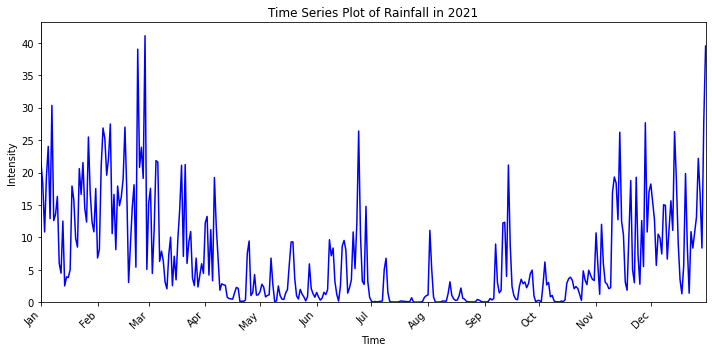

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

# Baca file dari direktori f
file_path = 'f:/nasa_power_data_filtered_within_describe_transpose.xlsx'
data = pd.read_excel(file_path)

# Ubah tipe data 'time' menjadi datetime
data['time'] = pd.to_datetime(data['time'])

# Filter data untuk tahun 2021
data_2021 = data[data['time'].dt.year == 2021]

# Konversi Series ke NumPy array
time_values = data_2021['time'].to_numpy()
mean_values = data_2021['mean'].to_numpy()

# Plot time series tanpa titik-titik
plt.figure(figsize=(10, 5))
plt.plot(time_values, mean_values, color='blue')  # Change the color to blue

# Atur judul dan label
plt.title('Time Series Plot of Rainfall in 2021')
plt.xlabel('Time')
plt.ylabel('Intensity')

# Set date format and ticks on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format with month abbreviation
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility

# Set x-axis limit to start from January and end at the last day of December
plt.xlim(left=pd.Timestamp('2021-01-01'), right=pd.Timestamp('2021-12-31'))

# Set y-axis limit to start from 0
plt.ylim(bottom=0)

# Tampilkan plot
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(pd.Timestamp('2021-01-01'), color='black', linewidth=0.5)  # Add vertical line at x=0

plt.tight_layout()
plt.show()


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

# Baca file dari direktori f
file_path = 'f:/nasa_power_data_filtered_within_describe_transpose.xlsx'
data = pd.read_excel(file_path)

# Ubah tipe data 'time' menjadi datetime
data['time'] = pd.to_datetime(data['time'])

# Filter data untuk tahun 2021 (perubahan ini)
data_2021 = data[data['time'].dt.year == 2021]

# Statistik deskriptif
descriptive_stats = data_2021['mean'].describe()

# Tampilkan statistik deskriptif
print(descriptive_stats)

# Inisialisasi DataFrame untuk menyimpan informasi per bulan
monthly_stats = pd.DataFrame(index=range(1, 13), columns=['Min Date', 'Min Value', 'Max Date', 'Max Value', 'Mode Value', 'Mode Dates'])

# Loop untuk setiap bulan
for month in range(1, 13):
    # Filter data untuk bulan tertentu
    data_month = data_2021[data_2021['time'].dt.month == month]

    # Temukan nilai maksimum, minimum, dan modus
    max_date = data_month.loc[data_month['mean'].idxmax()]['time'].date()
    max_value = data_month['mean'].max()

    min_date = data_month.loc[data_month['mean'].idxmin()]['time'].date()
    min_value = data_month['mean'].min()

    mode_values = data_month['mean'].mode()
    mode_dates = data_month[data_month['mean'].isin(mode_values)]['time'].dt.date

    # Simpan informasi ke dalam DataFrame
    monthly_stats.loc[month] = [min_date, min_value, max_date, max_value, mode_values.values, mode_dates.values]

# Tampilkan informasi per bulan
print("\nMonthly Statistics:")
print(monthly_stats)


count    365.000000
mean       6.893462
std        7.839024
min        0.004160
25%        0.803457
50%        3.393700
75%       10.848581
max       41.101764
Name: mean, dtype: float64

Monthly Statistics:
      Min Date Min Value    Max Date  Max Value  \
1   2021-01-14  2.508262  2021-01-07  30.356262   
2   2021-02-18  3.024236  2021-02-27  41.101764   
3   2021-03-11  2.055821  2021-03-05  21.832799   
4   2021-04-20  0.057508  2021-04-06  19.224275   
5   2021-05-09  0.102185  2021-05-19   9.306064   
6   2021-06-13  0.159987  2021-06-24  26.401617   
7   2021-07-26   0.00416  2021-07-09   6.773502   
8   2021-08-06  0.018102  2021-08-02  11.066396   
9   2021-09-02  0.027955  2021-09-14  21.152958   
10  2021-10-02  0.017642  2021-10-04   6.199431   
11  2021-11-03  1.209847  2021-11-28  27.670473   
12  2021-12-18  1.291565  2021-12-31  39.513668   

                                           Mode Value  \
1   [2.508261980830671, 3.801821086261981, 3.89454...   
2   [3.0242364

In [17]:
# Simpan informasi per bulan ke dalam file Excel
excel_output_path = 'F:/Kuliah/4. ITS s2/2023 - Thesis/Thesis/syntax/deskriptif_2021.xlsx'
monthly_stats.to_excel(excel_output_path, index_label='Month')

print(f'Deskriptif 2021 telah disimpan di:\n{excel_output_path}')

Deskriptif 2021 telah disimpan di:
F:/Kuliah/4. ITS s2/2023 - Thesis/Thesis/syntax/deskriptif_2021.xlsx


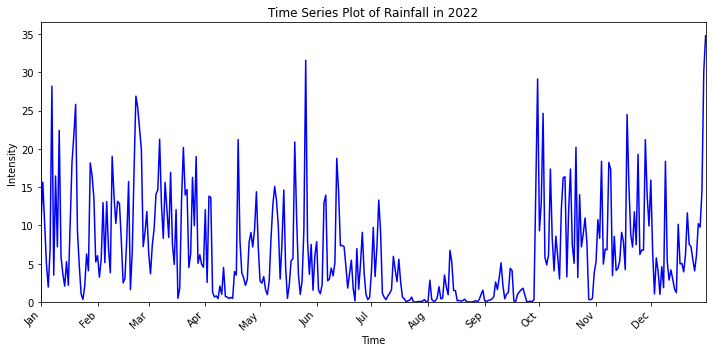

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

# Baca file dari direktori f
file_path = 'f:/nasa_power_data_filtered_within_describe_transpose.xlsx'
data = pd.read_excel(file_path)

# Ubah tipe data 'time' menjadi datetime
data['time'] = pd.to_datetime(data['time'])

# Filter data untuk tahun 2022
data_2022 = data[data['time'].dt.year == 2022]

# Konversi Series ke NumPy array
time_values = data_2022['time'].to_numpy()
mean_values = data_2022['mean'].to_numpy()

# Plot time series tanpa titik-titik
plt.figure(figsize=(10, 5))
plt.plot(time_values, mean_values, color='blue')  # Change the color to blue

# Atur judul dan label
plt.title('Time Series Plot of Rainfall in 2022')
plt.xlabel('Time')
plt.ylabel('Intensity')

# Set date format and ticks on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b'))  # Format with month abbreviation
plt.xticks(rotation=45, ha='right')  # Rotate labels for better visibility

# Set x-axis limit to start from January and end at the last day of December
plt.xlim(left=pd.Timestamp('2022-01-01'), right=pd.Timestamp('2022-12-31'))

# Set y-axis limit to start from 0
plt.ylim(bottom=0)

# Tampilkan plot
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(pd.Timestamp('2022-01-01'), color='black', linewidth=0.5)  # Add vertical line at x=0

plt.tight_layout()
plt.show()


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import calendar

# Baca file dari direktori f
file_path = 'f:/nasa_power_data_filtered_within_describe_transpose.xlsx'
data = pd.read_excel(file_path)

# Ubah tipe data 'time' menjadi datetime
data['time'] = pd.to_datetime(data['time'])

# Filter data untuk tahun 2022 (perubahan ini)
data_2022 = data[data['time'].dt.year == 2022]

# Statistik deskriptif
descriptive_stats = data_2022['mean'].describe()

# Tampilkan statistik deskriptif
print(descriptive_stats)

# Inisialisasi DataFrame untuk menyimpan informasi per bulan
monthly_stats = pd.DataFrame(index=range(1, 13), columns=['Min Date', 'Min Value', 'Max Date', 'Max Value', 'Mode Value', 'Mode Dates'])

# Loop untuk setiap bulan
for month in range(1, 13):
    # Filter data untuk bulan tertentu
    data_month = data_2022[data_2022['time'].dt.month == month]

    # Temukan nilai maksimum, minimum, dan modus
    max_date = data_month.loc[data_month['mean'].idxmax()]['time'].date()
    max_value = data_month['mean'].max()

    min_date = data_month.loc[data_month['mean'].idxmin()]['time'].date()
    min_value = data_month['mean'].min()

    mode_values = data_month['mean'].mode()
    mode_dates = data_month[data_month['mean'].isin(mode_values)]['time'].dt.date

    # Simpan informasi ke dalam DataFrame
    monthly_stats.loc[month] = [min_date, min_value, max_date, max_value, mode_values.values, mode_dates.values]

# Tampilkan informasi per bulan
print("\nMonthly Statistics:")
print(monthly_stats)


count    365.000000
mean       6.844557
std        6.653337
min        0.011188
25%        1.601764
50%        5.019093
75%        9.838965
max       34.757252
Name: mean, dtype: float64

Monthly Statistics:
      Min Date Min Value    Max Date  Max Value  \
1   2022-01-24  0.355776  2022-01-07  28.178115   
2   2022-02-19  1.634045  2022-02-22  26.876505   
3   2022-03-17  0.497246  2022-03-07  21.265393   
4   2022-04-08   0.46738  2022-04-19   21.21108   
5   2022-05-16  0.495885  2022-05-26   31.55816   
6   2022-06-22  0.170288  2022-06-12  18.758403   
7   2022-07-25  0.019514  2022-07-05  13.314722   
8   2022-08-24  0.011188  2022-08-13   6.750134   
9   2022-09-27  0.034364  2022-09-30  29.120179   
10  2022-10-29  0.306064  2022-10-03  24.632492   
11  2022-11-10  3.445917  2022-11-18  24.473591   
12  2022-12-06  1.004294  2022-12-31  34.757252   

                                           Mode Value  \
1   [0.355776357827476, 1.051482428115016, 1.97062...   
2   [1.6340447

In [22]:
# Simpan informasi per bulan ke dalam file Excel
excel_output_path = 'F:/Kuliah/4. ITS s2/2023 - Thesis/Thesis/syntax/deskriptif_2022.xlsx'
monthly_stats.to_excel(excel_output_path, index_label='Month')

print(f'Deskriptif 2022 telah disimpan di:\n{excel_output_path}')

Deskriptif 2022 telah disimpan di:
F:/Kuliah/4. ITS s2/2023 - Thesis/Thesis/syntax/deskriptif_2022.xlsx


In [2]:
import pandas as pd

file_path = 'f:/nasa_power_data_filtered_within_describe_transpose.xlsx'
data = pd.read_excel(file_path)

print(data)

            time  count       mean        std   min    25%    50%    75%  \
0     2018-01-01   1565   6.728665   2.846693  0.65   4.62   7.26   9.17   
1     2018-01-02   1565   5.272351   2.093617  0.71   4.10   5.27   7.04   
2     2018-01-03   1565   8.501463   3.515612  0.87   6.82   8.95   9.50   
3     2018-01-04   1565  10.173815   4.569312  1.24   6.78  12.29  13.65   
4     2018-01-05   1565   5.074479   5.185407  0.84   1.77   2.70   6.43   
...          ...    ...        ...        ...   ...    ...    ...    ...   
1821  2022-12-27   1565  10.232696   8.762225  0.93   2.68   7.18  18.44   
1822  2022-12-28   1565   9.781527   4.526681  3.80   6.20   9.74  11.23   
1823  2022-12-29   1565  14.508102   8.631864  5.92   9.22  12.22  17.50   
1824  2022-12-30   1565  30.069227  16.336989  5.64  16.95  20.01  46.74   
1825  2022-12-31   1565  34.757252  22.710385  5.56  18.79  23.05  58.79   

         max  
0      10.87  
1       8.89  
2      14.10  
3      17.17  
4      22.37

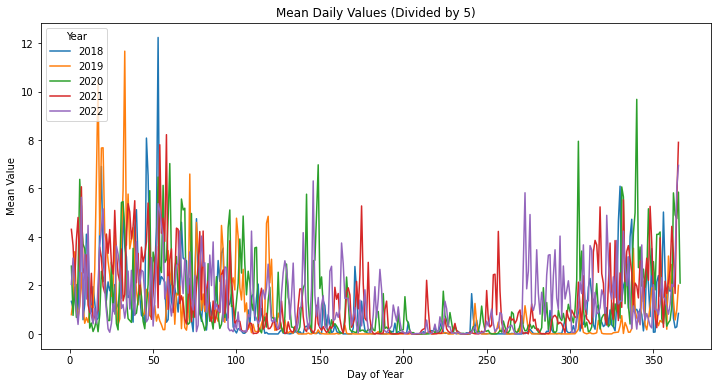

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'time' is in datetime format
data['time'] = pd.to_datetime(data['time'])

# Extract year and day of year from the 'time' column
data['year'] = data['time'].dt.year
data['day_of_year'] = data['time'].dt.dayofyear

# Group by year and day of year, calculate the mean, and divide by 5
grouped_data = data.groupby(['year', 'day_of_year'])['mean'].sum() / 5

# Reshape the data for plotting
plot_data = grouped_data.unstack(level=0)

# Plot the data
plot_data.plot(figsize=(12, 6), title='Mean Daily Values (Divided by 5)')
plt.xlabel('Day of Year')
plt.ylabel('Mean Value')
plt.legend(title='Year', loc='upper left')
plt.show()


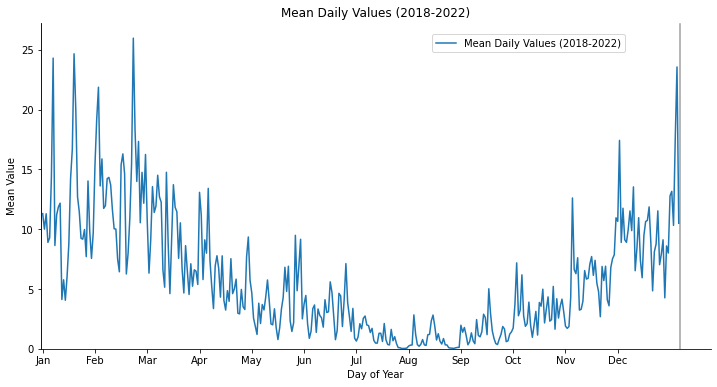

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Assuming 'time' is in datetime format
data['time'] = pd.to_datetime(data['time'])

# Extract year and day of year from the 'time' column
data['year'] = data['time'].dt.year
data['day_of_year'] = data['time'].dt.dayofyear

# Filter data for the specified years (2018, 2019, 2020, 2021, 2022)
selected_years = [2018, 2019, 2020, 2021, 2022]
filtered_data = data[data['year'].isin(selected_years)]

# Group by day of year and calculate the mean
grouped_data = filtered_data.groupby('day_of_year')['mean'].mean()

# Convert the index to a numpy array
index_array = grouped_data.index.to_numpy()

# Plot the data with different colors based on values
plt.figure(figsize=(12, 6))
plt.plot(index_array, grouped_data.values, label='Mean Daily Values (2018-2022)')
plt.title('Mean Daily Values (2018-2022)')
plt.xlabel('Day of Year')
plt.ylabel('Mean Value')

# Customize x-axis ticks and labels
months_ticks = [1 + 30 * i for i in range(12)]  # 15, 45, 75, ..., 345
month_names = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(months_ticks, month_names)

plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
plt.legend(loc='upper right', bbox_to_anchor=(0.88, 0.98))  # Adjust position using bbox_to_anchor

# Move the spines to the bottom and left to create the box with (0, 0) at the bottom-left corner
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis and y-axis limits to start from 0
plt.xlim(left=0)
plt.ylim(bottom=0)

# Add a shaded area for the last day of the year (31 December)
last_day_x = index_array[-1]
plt.axvspan(last_day_x, last_day_x + 1, alpha=0.2, color='black')

plt.show()


No handles with labels found to put in legend.


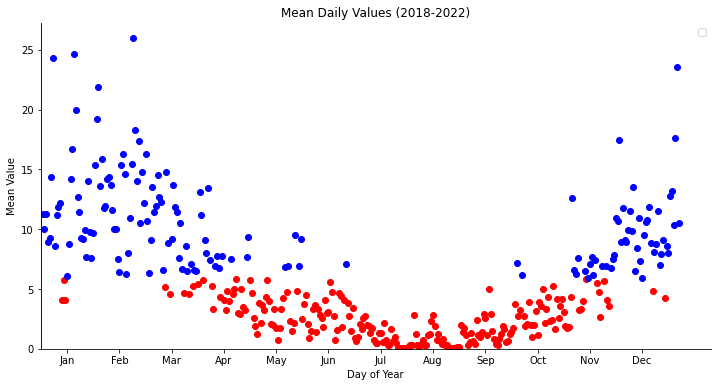

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import calendar

# Assuming 'time' is in datetime format
data['time'] = pd.to_datetime(data['time'])

# Extract year and day of year from the 'time' column
data['year'] = data['time'].dt.year
data['day_of_year'] = data['time'].dt.dayofyear

# Filter data for the specified years (2018, 2019, 2020, 2021, 2022)
selected_years = [2018, 2019, 2020, 2021, 2022]
filtered_data = data[data['year'].isin(selected_years)]

# Group by day of year and calculate the mean
grouped_data = filtered_data.groupby('day_of_year')['mean'].mean()

# Determine the midpoint of the mean values
mean_midpoint = grouped_data.mean()

# Convert the index to a numpy array
index_array = grouped_data.index.to_numpy()

# Plot the data with custom colors
plt.figure(figsize=(12, 6))
for day, value in zip(index_array, grouped_data.values):
    color = 'red' if value < mean_midpoint else 'blue'
    plt.plot(day, value, marker='o', color=color)

plt.title('Mean Daily Values (2018-2022)')
plt.xlabel('Day of Year')
plt.ylabel('Mean Value')

# Customize x-axis ticks and labels
months_ticks = [15 + 30 * i for i in range(12)]  # 15, 45, 75, ..., 345
month_names = [calendar.month_abbr[i] for i in range(1, 13)]
plt.xticks(months_ticks, month_names)

plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
plt.legend()

# Move the spines to the bottom and left to create the box with (0, 0) at the bottom-left corner
ax = plt.gca()
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set x-axis and y-axis limits to start from 0
plt.xlim(left=0)
plt.ylim(bottom=0)

plt.show()
